In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

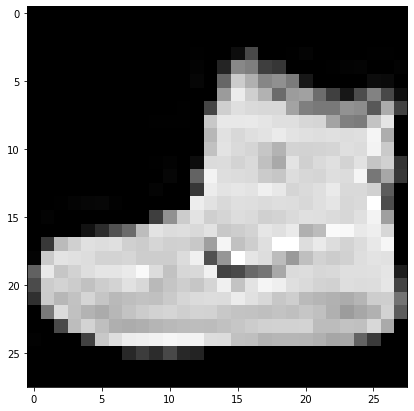

Label: 9


In [8]:
plt.figure(figsize=(7,7))
plt.imshow(train_images[0], cmap = 'gray')
plt.show()

print('Label:',train_labels[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [3]:
train_images = train_images/255.
test_images = test_images/255.

**Sequential:** That defines a SEQUENCE of layers in the neural network

**Flatten:** Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense:** Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5032 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3788 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3390 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3135 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.8916


In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8766


[0.34984004497528076, 0.8766000270843506]

### Exercise 1:

For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [14]:
classifications = model.predict(test_images)
print(classifications[0])

[1.4529262e-05 1.1858726e-06 6.1611715e-08 2.4170561e-08 2.2536317e-06
 2.8385047e-03 4.1228241e-06 1.6278934e-02 1.7536302e-05 9.8084277e-01]


The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

**It's the probability that this item is each of the 10 classes**

In [15]:
print(test_labels[0])

9


In [18]:
import numpy as np
print(np.argmax(classifications[0]))

9


### Exercise 2:

Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 

In [21]:
model = keras.models.Sequential([keras.layers.Flatten(),
                                 keras.layers.Dense(1024, activation = 'relu'),
                                 keras.layers.Dense(10, activation = 'softmax')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4683 - accuracy: 0.8324
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3570 - accuracy: 0.8692
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3206 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2982 - accuracy: 0.8903
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2796 - accuracy: 0.8956
[2.1231836e-08 1.1289787e-08 1.3289718e-07 1.6901106e-08 1.0540600e-07
 2.3528200e-03 5.3272805e-07 4.3919762e-03 1.2894013e-07 9.9325424e-01]
9


In [22]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3468 - accuracy: 0.8768


[0.3467712998390198, 0.876800000667572]

- Increase to 1024 Neurons -- What's the impact?
**Training takes longer, but is more accurate.**

### Exercise 3:

What would happen if you remove the Flatten() layer. Why do you think that's the case?

*You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.*

### Exercise 4:

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10?

*You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.*

### Exercise 5:

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

*There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.*

In [23]:
model = keras.models.Sequential([keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation = 'relu'),
                                 keras.layers.Dense(256, activation = 'relu'),                                 
                                 keras.layers.Dense(10, activation = 'softmax')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4690 - accuracy: 0.8316
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3551 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3172 - accuracy: 0.8825
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2962 - accuracy: 0.8877
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2792 - accuracy: 0.8953
[5.9791553e-08 4.5977603e-07 4.7423199e-09 8.6321945e-09 1.3066422e-08
 1.1321962e-03 6.3756040e-08 5.0609647e-03 8.7166448e-08 9.9380612e-01]
9


In [24]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3356 - accuracy: 0.8819


[0.3355972468852997, 0.8819000124931335]

### Exercise 6:

Consider the impact of training for more or less epochs. Why do you think that would be the case?

*Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right!*

In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation = 'relu'),
                                 keras.layers.Dense(10, activation = 'softmax')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=15)

classifications = model.predict(test_images)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5017 - accuracy: 0.8245
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3779 - accuracy: 0.8638
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3392 - accuracy: 0.8763
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3157 - accuracy: 0.8837
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2970 - accuracy: 0.8916
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.8954
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2695 - accuracy: 0.9003
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2600 - accuracy: 0.9034
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2488 - accuracy: 0.9066
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

### Exercise 7:

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

*It is better to get the input of your data normalized, because is going to help to the convergence of the loss function a*

### Exercise 8:

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss')<0.4):
            print("\nReached less than 0.4 loss so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

model = keras.models.Sequential([keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation = 'relu'),
                                 keras.layers.Dense(10, activation = 'softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4991
Epoch 2/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.3759
Reached less than 0.4 loss so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3759
